In [8]:
# # mount to google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# Load all library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Data loading

In [10]:


# load all datasets as dataframe
# data1 = pd.read_csv('/content/drive/My Drive/AIS_project/Data/Udemy.csv')
# data2 = pd.read_csv('/content/drive/My Drive/AIS_project/Data/skillshare.csv')
# data3 = pd.read_csv('/content/drive/My Drive/AIS_project/Data/edx.csv')
# data4 = pd.read_csv('/content/drive/My Drive/AIS_project/Data/Coursera.csv')
data1 = pd.read_csv('/Users/zhiyuwang/Documents/courses/AIS/AIS_project/Zhiyu/Data/Udemy.csv')
data2 = pd.read_csv('/Users/zhiyuwang/Documents/courses/AIS/AIS_project/Zhiyu/Data/skillshare.csv')
data3 = pd.read_csv('/Users/zhiyuwang/Documents/courses/AIS/AIS_project/Zhiyu/Data/edx.csv')
data4 = pd.read_csv('/Users/zhiyuwang/Documents/courses/AIS/AIS_project/Zhiyu/Data/Coursera.csv')
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)

In [11]:
print(f'df1:{df1.head()}')
print(f'df2:{df2.head()}')
print(f'df3:{df3.head()}')
print(f'df4:{df4.head()}')

df1:                                               title  \
0  The Complete Python Bootcamp From Zero to Hero...   
1         The Complete 2023 Web Development Bootcamp   
2                    The Web Developer Bootcamp 2023   
3  100 Days of Code: The Complete Python Pro Boot...   
4  React - The Complete Guide 2023 (incl. React R...   

                                         description  \
0  Learn Python like a Professional  Start from t...   
1  Become a Full-Stack Web Developer with just ON...   
2  10 Hours of React just added. Become a Develop...   
3  Master Python by building 100 projects in 100 ...   
4  Dive in and learn React.js from scratch! Learn...   

                                          instructor  rating  reviewcount  \
0                                      Jose Portilla     4.6       486391   
1                                      Dr. Angela Yu     4.7       338555   
2                                        Colt Steele     4.7       266527   
3             

In [12]:
print(f'df1:{df1.shape}')
print(f'df2:{df2.shape}')
print(f'df3:{df3.shape}')
print(f'df4:{df4.shape}')

df1:(26256, 8)
df2:(14250, 5)
df3:(816, 10)
df4:(1139, 9)


In [13]:
print(f'df1:{df1.columns}')
print(f'df2:{df2.columns}')
print(f'df3:{df3.columns}')
print(f'df4:{df4.columns}')

df1:Index(['title', 'description', 'instructor', 'rating', 'reviewcount',
       'duration', 'lectures', 'level'],
      dtype='object')
df2:Index(['title', 'link', 'duration', 'instructor', 'students'], dtype='object')
df3:Index(['title', 'link', 'institution', 'subject', 'level', 'prerequisites',
       'language', 'videotranscript', 'associatedprograms',
       'associatedskills'],
      dtype='object')
df4:Index(['partner', 'course', 'skills', 'rating', 'reviewcount', 'level',
       'certificatetype', 'duration', 'crediteligibility'],
      dtype='object')


### Data Processing

In [14]:
# Since all the four data frames as different columns, I will take the union of 4 dataframes and generate synthetic data if any of dataframe misses a certain column which exist in other dataframe

In [15]:
# Combine all unique column names
all_columns = set(df1.columns).union(set(df2.columns), set(df3.columns), set(df4.columns))
print(all_columns)
print(len(all_columns))   # eventually we have 22 features in my dataframe for clustering

{'duration', 'students', 'subject', 'videotranscript', 'lectures', 'description', 'instructor', 'partner', 'associatedprograms', 'level', 'reviewcount', 'crediteligibility', 'link', 'title', 'institution', 'skills', 'course', 'prerequisites', 'associatedskills', 'language', 'certificatetype', 'rating'}
22


In [16]:
# concatenate any columns appears more than once on all dfs and make it as a list. It will be used as later sythetic data generation
dfs = [df1, df2, df3, df4]

# 1. Concatenate DataFrames
df_combined = pd.concat(dfs, ignore_index=True, sort=False)

# 2. Fill the NaN in each column by the random selection from that columns to make a complete dataframe
def fill_nan_with_random(df):
    for col in df.columns:
        if df[col].isna().any():  # If NaN values exist in the column
            non_nan_values = df[col].dropna().values
            if len(non_nan_values) > 0:  # Ensure there are non-NaN values to sample from
                df[col] = df[col].apply(lambda x: np.random.choice(non_nan_values) if pd.isna(x) else x)
    return df

df_combined = fill_nan_with_random(df_combined)
print(df_combined.head())
print(df_combined.isna().sum())

                                               title  \
0  The Complete Python Bootcamp From Zero to Hero...   
1         The Complete 2023 Web Development Bootcamp   
2                    The Web Developer Bootcamp 2023   
3  100 Days of Code: The Complete Python Pro Boot...   
4  React - The Complete Guide 2023 (incl. React R...   

                                         description  \
0  Learn Python like a Professional  Start from t...   
1  Become a Full-Stack Web Developer with just ON...   
2  10 Hours of React just added. Become a Develop...   
3  Master Python by building 100 projects in 100 ...   
4  Dive in and learn React.js from scratch! Learn...   

                                          instructor  rating reviewcount  \
0                                      Jose Portilla     4.6      486391   
1                                      Dr. Angela Yu     4.7      338555   
2                                        Colt Steele     4.7      266527   
3                     

In [17]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               42461 non-null  object 
 1   description         42461 non-null  object 
 2   instructor          42461 non-null  object 
 3   rating              42461 non-null  float64
 4   reviewcount         42461 non-null  object 
 5   duration            42461 non-null  object 
 6   lectures            42461 non-null  object 
 7   level               42461 non-null  object 
 8   link                42461 non-null  object 
 9   students            42461 non-null  object 
 10  institution         42461 non-null  object 
 11  subject             42461 non-null  object 
 12  prerequisites       42461 non-null  object 
 13  language            42461 non-null  object 
 14  videotranscript     42461 non-null  object 
 15  associatedprograms  42461 non-null  object 
 16  asso

In [18]:
for col in df_combined.columns:
    print(f"{col}: {df_combined[col].apply(type).value_counts()}")

title: title
<class 'str'>    42461
Name: count, dtype: int64
description: description
<class 'str'>    42461
Name: count, dtype: int64
instructor: instructor
<class 'str'>    42461
Name: count, dtype: int64
rating: rating
<class 'float'>    42461
Name: count, dtype: int64
reviewcount: reviewcount
<class 'int'>    40913
<class 'str'>     1548
Name: count, dtype: int64
duration: duration
<class 'str'>    42461
Name: count, dtype: int64
lectures: lectures
<class 'str'>    42461
Name: count, dtype: int64
level: level
<class 'str'>    42461
Name: count, dtype: int64
link: link
<class 'str'>    42461
Name: count, dtype: int64
students: students
<class 'str'>    42461
Name: count, dtype: int64
institution: institution
<class 'str'>    42461
Name: count, dtype: int64
subject: subject
<class 'str'>    42461
Name: count, dtype: int64
prerequisites: prerequisites
<class 'str'>    42461
Name: count, dtype: int64
language: language
<class 'str'>    42461
Name: count, dtype: int64
videotranscript: 

In [22]:
non_int_rows = df_combined[df_combined['reviewcount'].apply(lambda x: not isinstance(x, int))]
non_int_rows

,title,description,instructor,rating,reviewcount,duration,lectures,level,link,students,...,prerequisites,language,videotranscript,associatedprograms,associatedskills,partner,course,skills,certificatetype,crediteligibility
26257,Video Editing with Adobe Premiere Pro for Begi...,"#1 most current, professional, no-nonsense and...",Jordy Vandeput,4.4,285,3h 21m,71 lectures,Introductory,https://www.skillshare.com/en/classes/Video-Ed...,"126,674 students",...,None.,English,English,Professional CertificateinData Science Foundat...,"Computer Vision, Artificial Intelligence, Data...",IBM,Reporting extra-financier et stratégie RSE,"{"" Entrepreneurship"","" Leadership and Manageme...",Course,False
26279,Basic Skills / Getting Started with Drawing,Step-By-Step Process that simplifies making a ...,Brent Eviston,4.8,18.4k,4h 21m,49 lectures,Beginner,https://www.skillshare.com/en/classes/Basic-Sk...,"113,577 students",...,None.,Español,Español,Professional CertificateinComputer Science for...,"Unit Testing, Python (Programming Language), A...",Google Cloud,"Effective Communication: Writing, Design, and ...","{"" Big Data"","" Computer Security Incident Mana...",Course,False
26290,Learn to Draw: Daily Practices to Improve Your...,Leading agile transformation and implement agi...,Gabrielle Brickey,4.8,5.8k,1h 23m,43 lectures,All Levels,https://www.skillshare.com/en/classes/Learn-to...,"103,747 students",...,Ninguno,English,Español,Professional Certificate inAnimal Behaviour in...,"Marketing, Curiosity, Strategic Marketing, Com...",HRCI,"Make the Sale: Build, Launch, and Manage E-com...","{"" Python Programming"","" Databases"","" HTML and...",Professional Certificate,False
26322,Logo Design with Grids: Timeless Style from Si...,Cloud Computing | Instance Deployment and Conf...,George Bokhua,4.7,2.8k,31m,11 lectures,Intermediate,https://www.skillshare.com/en/classes/Logo-Des...,"54,409 students",...,Pas de prérequis.,English,English,MicroMasters®Program inInternational Law,"Urbanization, Groundwater, Rural Development, ...",Google,MLOps | Machine Learning Operations,"{"" Collaboration"","" Communication"","" Leadershi...",Degree,False
26364,Illustrating in Procreate: Drawing a Shareable...,Learn how to embrace your unique value in your...,Vashti Harrison,3.9,1.8k,1h 6m,108 lectures,All Levels,https://www.skillshare.com/en/classes/Illustra...,"30,269 students",...,Completion of courses 1-8 within the Full Stac...,English,English,Professional Certificate inUpper-Intermediate ...,"Property Rights, Infrastructure, Value Systems...",Microsoft,Renewable Energy,"{"" Leadership and Management"","" Accounting"","" ...",Specialization,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42397,Complete Beginners Guide to Blender 3D,Use Your Angular 2+ Skills to Build and Deplo...,Robin Hall,4.2,5.2k,18-24 Months,26 lectures,All Levels,https://www.skillshare.com/en/classes/Fantasy-...,201 students,...,Secondary school (high school) algebra; basic ...,English,English,Professional CertificateinAI Skills: Basic and...,"Computer Science, Cyber Security, Computer Sec...",HEC Paris,Executive MSc & MSc in Innovation and Entrepre...,"{"" Leadership and Management"","" Entrepreneursh...",Degree,True
42407,Azure Devops Crash Course -Build CI/CD release...,Overcome your Excel formula phobias with this ...,"Nav Gupta, Karen Browne",4.5,5.8k,1 - 4 Years,25 lectures,Intermediate,https://www.skillshare.com/en/classes/Create-a...,688 students,...,High school level in scientific fields such as...,English,English,Professional Certificate inCell Physiology,"Telecommunications, Business Strategies, Compu...",Ball State University,Master of Science in Computer Science,"{"" Computer Programming"","" Programming Princip...",Degree,True
42412,Email Productivity: Work Smarter with Your Inbox,A comprehensive guide for MATLAB image process...,Tom Wiztek,4.6,726,1 - 4 Years,774 lectures,All Levels,https://www.skillshare.com/en/classes/From-La

In [25]:
# convert all str data in reviewcount column to int
def convert_to_int(value):
    try:
        if isinstance(value, str):
            if 'k' in value.lower():
                return int(float(value.replace('k', '')) * 1_000)
            elif 'm' in value.lower():
                return int(float(value.replace('m', '')) * 1_000_000)
        # If it's already a number (int in string format), convert directly
        return int(value)
    except ValueError:
        return None  # or np.nan if using with pandas

# Apply the function and convert 'reviewcount' to integer type
df_combined['reviewcount'] = df_combined['reviewcount'].apply(convert_to_int)
for col in df_combined.columns:
    print(f"{col}: {df_combined[col].apply(type).value_counts()}")
df_combined.info()

title: title
<class 'str'>    42461
Name: count, dtype: int64
description: description
<class 'str'>    42461
Name: count, dtype: int64
instructor: instructor
<class 'str'>    42461
Name: count, dtype: int64
rating: rating
<class 'float'>    42461
Name: count, dtype: int64
reviewcount: reviewcount
<class 'int'>    42461
Name: count, dtype: int64
duration: duration
<class 'str'>    42461
Name: count, dtype: int64
lectures: lectures
<class 'str'>    42461
Name: count, dtype: int64
level: level
<class 'str'>    42461
Name: count, dtype: int64
link: link
<class 'str'>    42461
Name: count, dtype: int64
students: students
<class 'str'>    42461
Name: count, dtype: int64
institution: institution
<class 'str'>    42461
Name: count, dtype: int64
subject: subject
<class 'str'>    42461
Name: count, dtype: int64
prerequisites: prerequisites
<class 'str'>    42461
Name: count, dtype: int64
language: language
<class 'str'>    42461
Name: count, dtype: int64
videotranscript: videotranscript
<class 

### Data enumerating

In [32]:
#enumerate categorical and boonlean data

categorical_columns = df_combined.select_dtypes(include=['object']).columns

# Use LabelEncoder for enumerating the categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df_combined[col] = label_encoder.fit_transform(df_combined[col])

# Step 2: Scaling Numerical Variables
# Identify numerical columns
numerical_columns = df_combined.select_dtypes(include=['float64', 'int64']).columns

# Use StandardScaler to scale the numerical columns
scaler = StandardScaler()
df_combined[numerical_columns] = scaler.fit_transform(df_combined[numerical_columns])

# Step 3: Convert the boolean column to integers
df_combined['crediteligibility'] = df_combined['crediteligibility'].astype(int)

# Now the data is ready for clustering
print(df_combined.head())


      title  description  instructor    rating  reviewcount  duration  \
0  1.321897    -0.065790   -0.130313  0.642702    51.498652 -0.328402   
1  1.279461    -1.347231   -0.850187  0.881755    35.787546  1.442142   
2  1.408985    -1.719043   -1.079867  0.881755    28.132850  1.743065   
3 -1.715524     0.736112   -0.850187  0.881755    26.544906  1.169213   
4  0.904609    -0.846772   -1.719134  0.642702    21.026953  1.746564   

   lectures     level      link  students  ...  prerequisites  language  \
0 -1.106613 -0.603666 -0.218865 -1.099821  ...      -1.598505 -0.396435   
1  0.161017 -0.603666  0.153090 -0.373023  ...       0.853559 -0.396435   
2  1.371264 -0.603666  0.168070  1.013630  ...      -0.138412 -0.396435   
3  1.193901 -0.603666 -1.204522  0.326451  ...       0.597207 -0.396435   
4  1.397347 -0.603666  0.233058 -0.416057  ...      -0.093829 -0.396435   

   videotranscript  associatedprograms  associatedskills   partner    course  \
0        -0.401938           -

## K-means clustering

### 1. hyperparameter tuning using __elbow (intertia) methods__.
Elbow Method examines the sum of squared distances from each point to its assigned cluster center (inertia). The idea is to find the "elbow" point where adding more clusters does not significantly reduce inertia

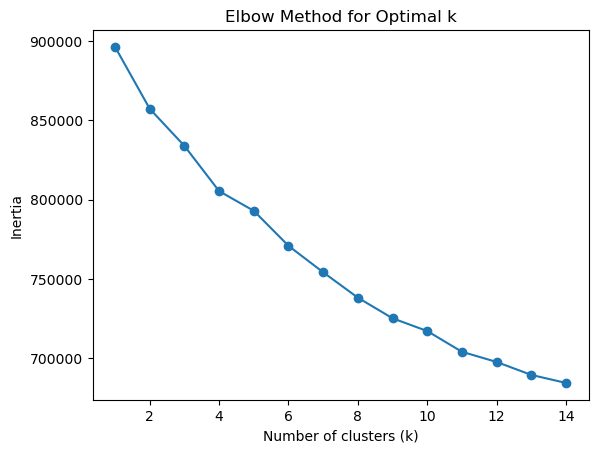

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range for the number of clusters
k_values = range(1, 15)
inertias = []

# Calculate inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_combined)  
    inertias.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# didn't see the elbow


#### increase #cluster range

In [43]:
!pip install kneed

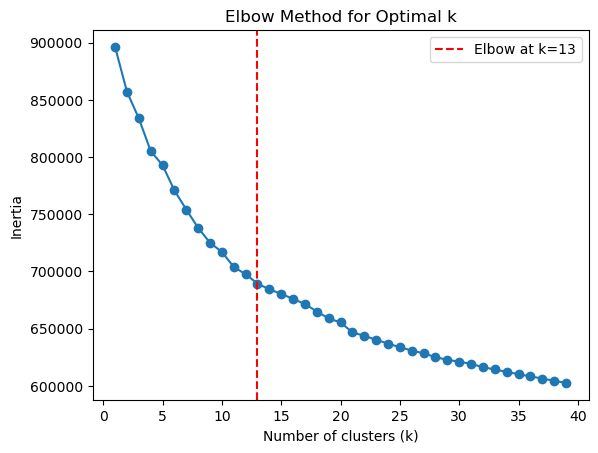

The elbow point is at k = 13


In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Define a range for the number of clusters
k_values = range(1, 40)
inertias = []

# Calculate inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_combined)  
    inertias.append(kmeans.inertia_)

# Use KneeLocator to identify the elbow point
knee_locator = KneeLocator(k_values, inertias, curve='convex', direction='decreasing')
elbow_point = knee_locator.elbow

# Plot the inertia values with the identified elbow
plt.plot(k_values, inertias, marker='o')
plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Elbow at k={elbow_point}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()

print(f"The elbow point is at k = {elbow_point}")

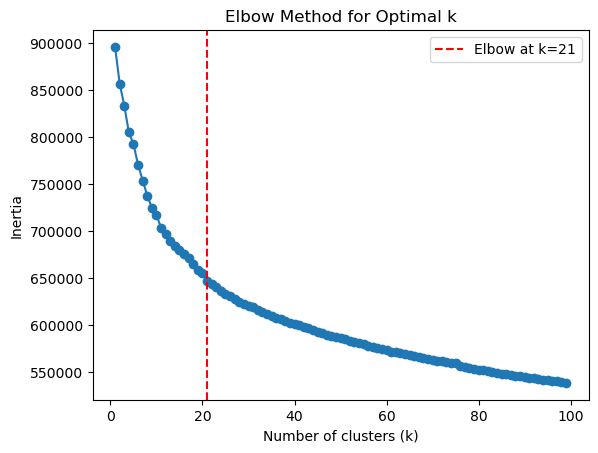

The elbow point is at k = 21


In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range for the number of clusters
k_values = range(1, 100)
inertias = []

# Calculate inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_combined)  
    inertias.append(kmeans.inertia_)

# Use KneeLocator to identify the elbow point
knee_locator = KneeLocator(k_values, inertias, curve='convex', direction='decreasing')
elbow_point = knee_locator.elbow

# Plot the inertia values with the identified elbow
plt.plot(k_values, inertias, marker='o')
plt.axvline(x=elbow_point, color='red', linestyle='--', label=f'Elbow at k={elbow_point}')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()

print(f"The elbow point is at k = {elbow_point}")



#### clusters visualization

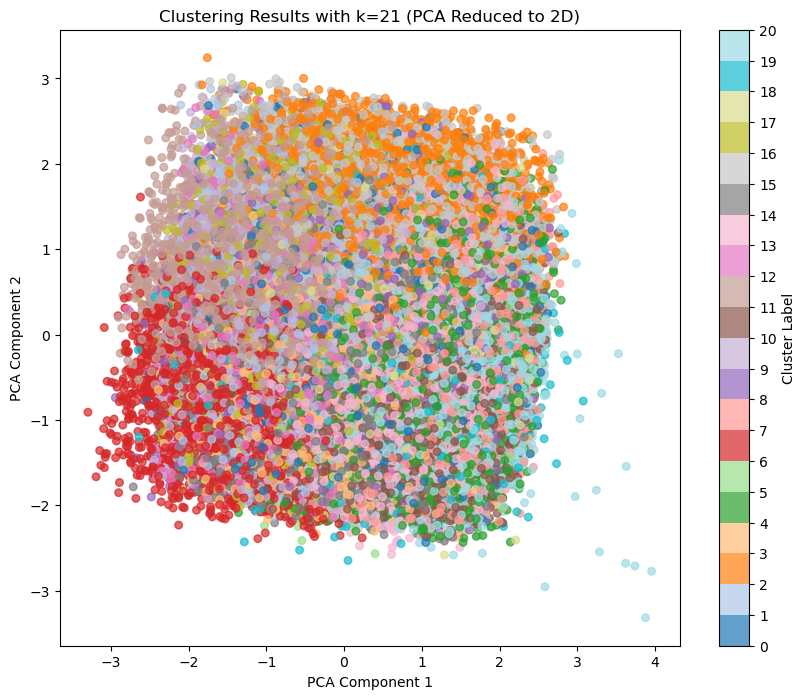

In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Run KMeans with k=21
kmeans = KMeans(n_clusters=21, random_state=0)
cluster_labels = kmeans.fit_predict(df_combined)

# Use PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_combined)

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='tab20', s=30, alpha=0.7)
plt.colorbar(scatter, ticks=range(21), label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Results with k=21 (PCA Reduced to 2D)')
plt.show()


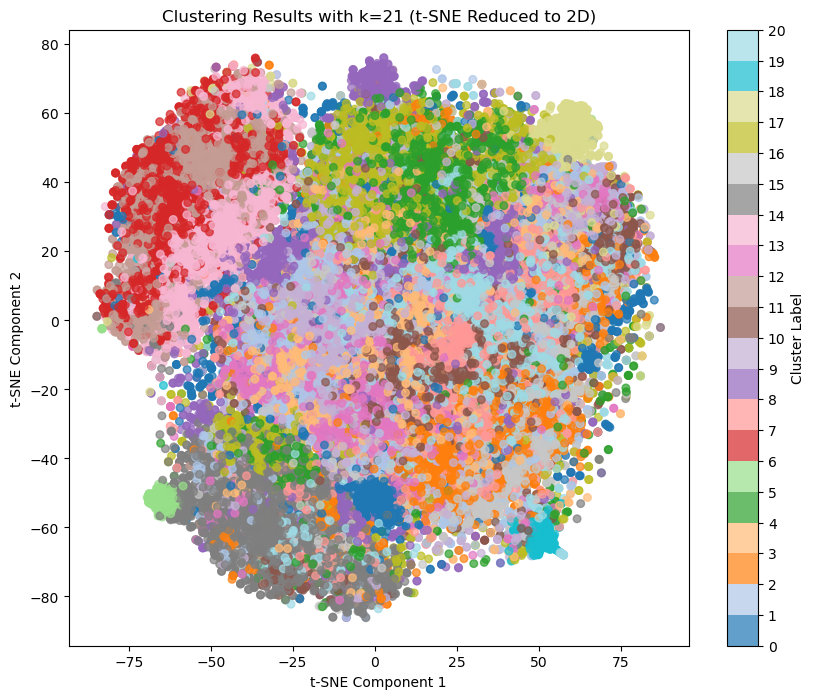

In [48]:
from sklearn.manifold import TSNE

# Use t-SNE for non-linear dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
reduced_data_tsne = tsne.fit_transform(df_combined)

# Create a scatter plot of the clusters using t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=cluster_labels, cmap='tab20', s=30, alpha=0.7)
plt.colorbar(scatter, ticks=range(21), label='Cluster Label')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Clustering Results with k=21 (t-SNE Reduced to 2D)')
plt.show()


### 2. hyperparameter tuning use __silhoutte score__
Which is the mean silhouette coefficient over all the instances. The instance’s silhouette coefficient is equal to (b – a) / max(a, b), where a is the mean distance to the other instances in the same cluster (i.e., the mean intra-cluster distance) and b is the mean nearest-cluster distance (i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes b, excluding the instance’s own cluster). The silhouette coefficient can vary between –1 and +1. A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to –1 means that the instance may have been assigned to the wrong cluster.

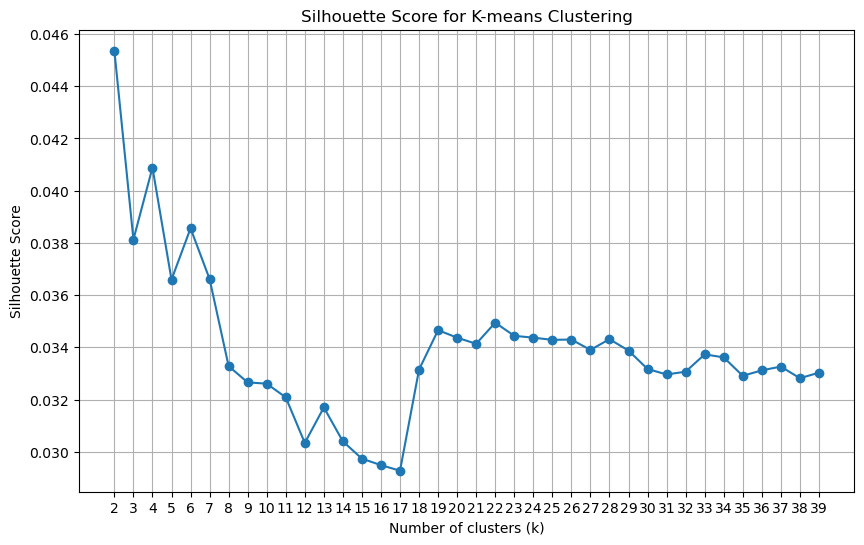

The optimal number of clusters (k) based on silhouette score is: 2


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a range for the number of clusters
k_values = range(2, 40)  # Start from 2 since silhouette score needs at least 2 clusters
silhouette_scores = []

# Calculate silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(df_combined)  # df_combined is your dataset
    score = silhouette_score(df_combined, cluster_labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-means Clustering')
plt.xticks(k_values)
plt.grid()
plt.show()

# Identify the optimal k
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters (k) based on silhouette score is: {optimal_k}")


In [ ]:
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df_combined.select_dtypes(include=[int, float]))

# # Step 3: Apply K-Means Clustering
# kmeans = KMeans(n_clusters=5, random_state=42)  # Set the desired number of clusters
# df_combined['cluster'] = kmeans.fit_predict(scaled_data)

# # Step 4: Check the number of clusters formed
# number_of_clusters = df_combined['cluster'].nunique()
# print(f"Number of clusters formed: {number_of_clusters}")
# plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df_combined['cluster'], cmap='viridis')
# plt.title('Cluster Visualization')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()

## K-mean++ and mini-batch K-Means